# Analyzing the clusters
In the previous notebooks, we have been through the process of Data cleaning, gathering the behaviour of the stations on weekdays, adding geolocation data and finally classifying them by clusters. Now it is time to understand why the model has classified these clusters this way, and understand what do the stations of each cluster have in common.

In [224]:
#importing needed libraries
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [183]:
clusters = pd.read_csv("..\\Dataset\\clusters.csv",encoding="utf_8",decimal=',', sep=';')

In [184]:
clusters.head()

,station_id,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,...,20:00,21:00,22:00,23:00,capacity,lat,long,DisttoCentre,labels,labelsPCA
0,1,78.0,79.0,79.0,80.0,79.0,70.0,39.0,13.0,17.0,...,53.0,59.0,67.0,73.0,30,41.397952,2.180042,1.47,4,0
1,2,50.0,52.0,51.0,50.0,50.0,44.0,27.0,13.0,12.0,...,33.0,38.0,46.0,47.0,27,41.395530,2.177060,1.11,1,4
2,3,61.0,62.0,62.0,62.0,61.0,62.0,53.0,29.0,15.0,...,61.0,60.0,61.0,64.0,27,41.394055,2.181299,1.22,4,0
3,4,47.0,46.0,47.0,49.0,55.0,67.0,48.0,23.0,10.0,...,55.0,46.0,46.0,50.0,21,41.393480,2.181555,1.20,4,0
4,5,63.0,63.0,62.0,61.0,62.0,59.0,48.0,24.0,21.0,...,69.0,70.0,69.0,64.0,39,41.391075,2.180223,0.96,4,0


In [185]:
clusters.labels.value_counts()

3    101
1     81
4     80
0     79
2     67
Name: labels, dtype: int64

There are 5 different clusters, where 4 of them have similar values (67-81) and one has 101 stations. Let's try to understand one by one what do they have in common.

# Cluster 0
#### Summary extracted after seeing the cells below:
69 stations
Distance to the city centre is not rellevant [Between 0,6km to 5,69km]

In [186]:
clusters[clusters.labels == 2].describe()

,station_id,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,...,20:00,21:00,22:00,23:00,capacity,lat,long,DisttoCentre,labels,labelsPCA
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000
mean,205.641791,15.149254,14.283582,13.567164,13.343284,14.865672,26.298507,55.253731,76.253731,81.925373,...,16.164179,16.208955,15.552239,15.074627,28.238806,41.390387,2.177589,2.221194,2.0,2.029851
std,141.291307,14.905006,13.692296,13.412143,12.927012,11.802536,14.900696,18.399887,13.398715,9.155746,...,12.334476,13.496955,14.288461,15.755051,7.041198,0.012393,0.026089,1.481069,0.0,0.171460
min,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,21.000000,33.000000,56.000000,...,1.000000,1.000000,0.000000,0.000000,15.000000,41.357067,2.111615,0.080000,2.0,2.000000
25%,67.500000,2.000000,2.000000,2.000000,2.500000,5.500000,14.000000,38.000000,70.500000,76.000000,...,7.000000,5.500000,4.000000,3.000000,27.000000,41.386481,2.164771,0.620000,2.0,2.000000
50%,160.000000,8.000000,8.000000,7.000000,8.000000,12.000000,26.000000,57.000000,80.000000,84.000000,...,13.000000,11.000000,9.000000,7.000000,27.000000,41.389670,2.186711,2.160000,2.0,2.000000
75%,350.000000,28.500000,26.500000,25.000000,22.500000,22.000000,37.000000,69.500000,86.000000,89.000000,...,21.000000,25.000000,27.500000,27.500000,31.500000,41.399011,2.195730,3.370000,2.0,2.000000
max,494.000000,50.000000,43.000000,43.000000,55.000000,63.000000,64.000000,86.000000,93.000000,95.000000,...,52.000000,53.000000,55.000000,60.000000,54.000000,41.413592,2.221153,5.190000,2.0,3.000000


In [229]:
clu_means = clusters.groupby('labels',as_index=False).mean().round(decimals=2)

In [230]:
clu_means

,labels,station_id,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,...,19:00,20:00,21:00,22:00,23:00,capacity,lat,long,DisttoCentre,labelsPCA
0,0,194.63,54.91,50.92,46.16,41.76,39.01,37.73,43.03,56.58,...,62.58,64.57,64.94,63.27,60.04,26.16,41.40,2.19,2.69,2.96
1,1,244.60,48.51,53.43,57.51,60.01,59.10,45.90,25.32,14.69,...,25.07,29.44,31.28,34.51,40.33,24.20,41.40,2.16,3.10,4.00
2,2,205.64,15.15,14.28,13.57,13.34,14.87,26.30,55.25,76.25,...,15.43,16.16,16.21,15.55,15.07,28.24,41.39,2.18,2.22,2.03
3,3,215.38,11.87,13.92,16.12,19.17,20.89,19.03,15.27,13.91,...,11.79,12.02,11.18,10.04,10.18,23.53,41.40,2.15,2.75,1.00
4,4,212.01,82.28,82.25,81.96,80.84,78.00,65.88,41.62,24.64,...,74.20,76.16,78.10,80.88,83.36,26.76,41.40,2.18,2.74,0.00


In [231]:
clu_means.drop(columns=['station_id','capacity','lat','long','DisttoCentre','labelsPCA','labels'],inplace=True)

In [232]:
clu_means = clu_means.transpose()

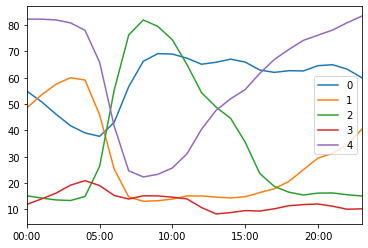

In [236]:
clu_means.plot()

In [240]:
fig = go.Figure(
        data=[
             go.Scatter(x=clu_means.index, 
                       y=clu_means[0],
                       mode='lines',
                       name='Cluster 0',
                       line = dict(
                           width = 6,
                           color = 'rgb(51,96,140)')),
             go.Scatter(x=clu_means.index, 
                       y=clu_means[1],
                       mode='lines',
                       name='Cluster 1',
                       line = dict(
                           width = 6,
                           color = 'rgb(195,106,156)')),
            go.Scatter(x=clu_means.index, 
                       y=clu_means[2],
                       mode='lines',
                       name='Cluster 2',
                       line = dict(
                           width = 6,
                           color = 'rgb(246,186,87)')),
            go.Scatter(x=clu_means.index, 
                       y=clu_means[3],
                       mode='lines',
                       name='Cluster 3',
                       line = dict(
                           width = 6,
                           color = 'rgb(228,96,72)')),
            go.Scatter(x=clu_means.index, 
                       y=clu_means[4],
                       mode='lines',
                       name='Cluster 4',
                       line = dict(
                           width = 6,
                           color = 'rgb(184,24,64)')),
            
        ],
        layout=go.Layout(
            title=dict(text='Clusters Workdays hourly behaviour'),
            xaxis=dict(title='Hours'),
            yaxis=dict(title='% of bike ocupation')))

fig.add_trace(go.Scatter(x=['06:00','06:00'], y=[0,100], mode="lines", name="Morning rush hour start",line = dict(
                           width = 3,
                           color = 'rgb(0,0,0)')))
fig.add_trace(go.Scatter(x=['09:00','09:00'], y=[0,100], mode="lines", name="Morning rush hour finish",line = dict(
                           width = 3,
                           color = 'rgb(0,0,0)')))
fig.add_trace(go.Scatter(x=['17:00','17:00'], y=[0,100], mode="lines", name="Evening rush hour",line = dict(
                           width = 3,
                           color = 'rgb(0,0,0)')))

fig.show()

In [227]:
fig2 = go.Figure(
        data=[
             go.Scatter(x=clu_means.index, 
                       y=clu_means[0],
                       mode='lines',
                       name='Cluster 0',
                       line = dict(
                           width = 6,
                           color = 'rgb(51,96,140)'))
        ],
    layout=go.Layout(
            title=dict(text='Clusters Workdays hourly behaviour'),
            xaxis=dict(title='Hours'),
            yaxis=dict(title='% of bike ocupation')))
fig2.show()

In [ ]:
fig3 = go.Figure(
        data=[
             go.Scatter(x=unemployment.index, 
                       y=unemployment.Barcelona,
                       mode='lines+markers',
                       name='Barcelona',
                       line = dict(
                           width = 6,
                           color = 'rgb(0,0,0)')),
             go.Scatter(x=unemployment.index, 
                       y=unemployment.Sant_Antoni,
                       mode='lines+markers',
                       name='Sant Antoni',
                       line = dict(
                           width = 8,
                           color = 'rgb(255, 0, 0)')),
            go.Scatter(x=unemployment.index, 
                       y=unemployment.Raval,
                       mode='lines',
                       name='Raval',
                       line = dict(
                           width = 4,
                           color = 'rgb(192,192,192)')),
            go.Scatter(x=unemployment.index, 
                       y=unemployment.Antiga_Esq_Eixample,
                       mode='lines',
                       name="Antiga Esquerra de l'Eixample",
                       line = dict(
                           width = 4,
                           color = 'rgb(192,192,192)')),
            go.Scatter(x=unemployment.index, 
                       y=unemployment.Nova_Esq_Eixample,
                       mode='lines',
                       name="Nova Esquerra de l'Eixample",
                       line = dict(
                           width = 4,
                           color = 'rgb(192,192,192)')),
            go.Scatter(x=unemployment.index, 
                       y=unemployment.Poble_Sec,
                       mode='lines',
                       name='Poblesec',
                       line = dict(
                           width = 4,
                           color = 'rgb(192,192,192)'))
        ],
        layout=go.Layout(
            title=dict(text='Sant Antoni and surroundings Unemployment Rate'),
            xaxis=dict(title='Year'),
            yaxis=dict(title='Unemployment Rate')))

fig3.add_trace(go.Scatter(x=['5-18', '5-18'], y=[3.5,11], mode="lines", name="Market Reopening"))
fig3.show()

Extractions from the graph:
* Cluster 0: Stations behave as residential place: full at night, get empty at morning rush hour and then slowly increases the number of bikes towards the day.
Below Gran Via and Meridiana.
* Cluster 1: Tend to be empty all day.
* Cluster 2: Stations from this cluster behave as work/educational locations. At morning rush hour the tendency is too get filled by bikes and then it slowly gets empty towards the end of the day.
* Cluster 3: Stations of cluster 3 tend to be half-full throughout most part of the day.
* Cluster 4: Stations behave similarly as the ones with Cluster 0, but having less number of bikes and a less aggressive tendency (hypothesis: maybe they are located at higher parts of the city than cluster 0?)


In [156]:
clusters[clusters.station_id == 192]

,station_id,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,...,20:00,21:00,22:00,23:00,capacity,lat,long,DisttoCentre,labels,labelsPCA
181,192,53.0,56.0,58.0,59.0,55.0,34.0,6.0,3.0,4.0,...,44.0,42.0,47.0,55.0,21,41.378629,2.133467,3.2,1,4
